In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Aave= pd.read_csv('coin_Aave.csv')
Aave['Date']=pd.to_datetime(Aave['Date'])
Aave

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [3]:
Aave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        275 non-null    int64         
 1   Name       275 non-null    object        
 2   Symbol     275 non-null    object        
 3   Date       275 non-null    datetime64[ns]
 4   High       275 non-null    float64       
 5   Low        275 non-null    float64       
 6   Open       275 non-null    float64       
 7   Close      275 non-null    float64       
 8   Volume     275 non-null    float64       
 9   Marketcap  275 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 21.6+ KB


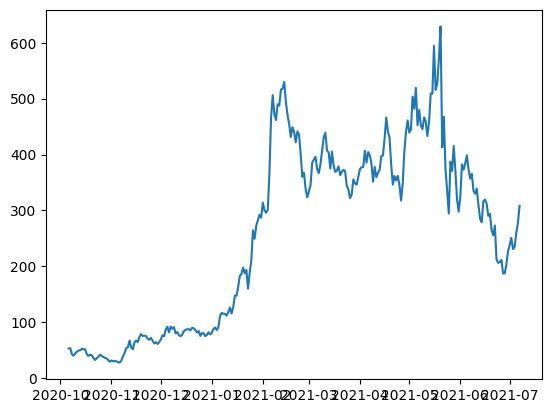

In [4]:
open_vis=plt.plot(Aave['Date'],Aave['Open'])
open_vis

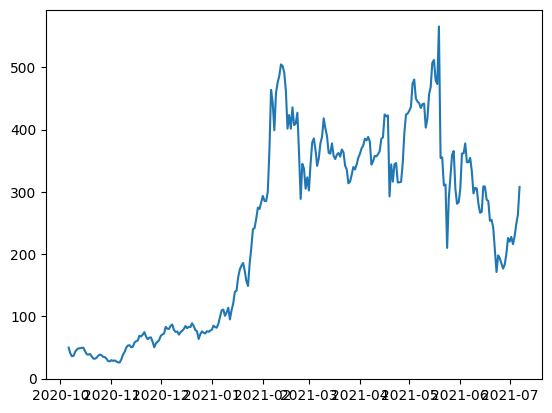

In [5]:
plt.plot(Aave['Date'],Aave['Low'])


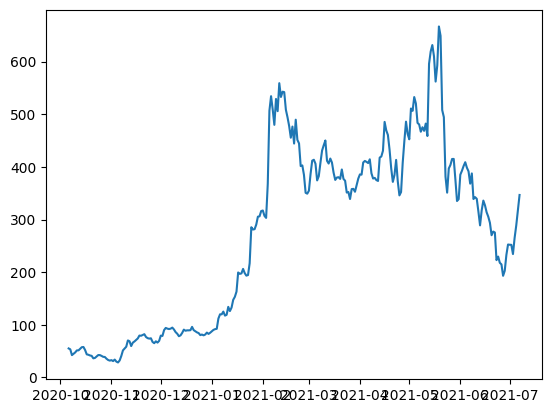

In [6]:
plt.plot(Aave['Date'],Aave['High'])


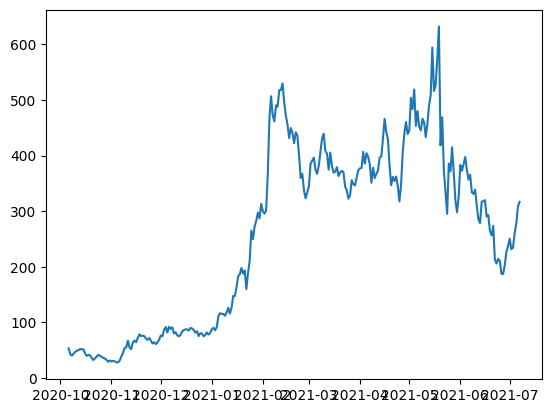

In [7]:
plt.plot(Aave['Date'],Aave['Close'])


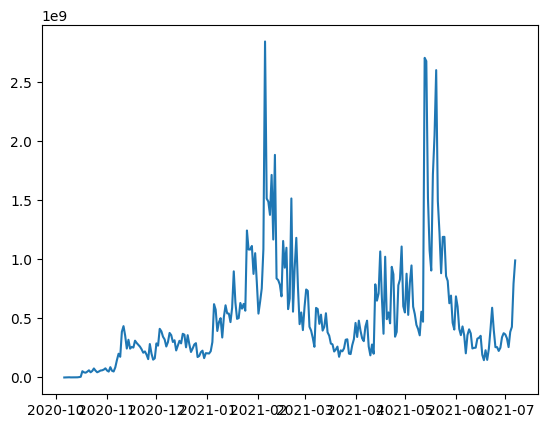

In [8]:
plt.plot(Aave['Date'],Aave['Volume'])

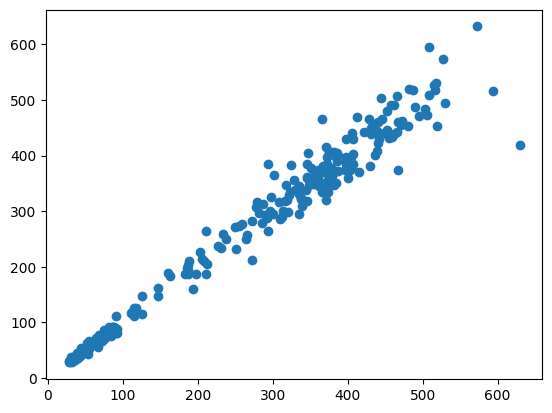

In [9]:
plt.scatter(Aave['Open'],Aave['Close'])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
open_data=Aave[['Date','Open','Close']]
X = open_data[['Open']]
y = open_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model=LinearRegression()
model.fit(X_train,y_train)
lin_pred= model.predict(X_test)

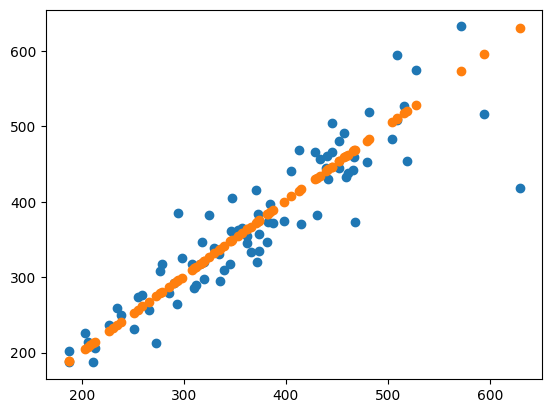

In [12]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,lin_pred)

In [13]:
multi_data=Aave[['High','Open','Close']]
X = multi_data[['Open','High']]
y = multi_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model=LinearRegression()
model.fit(X_train,y_train)
multi_pred= model.predict(X_test)

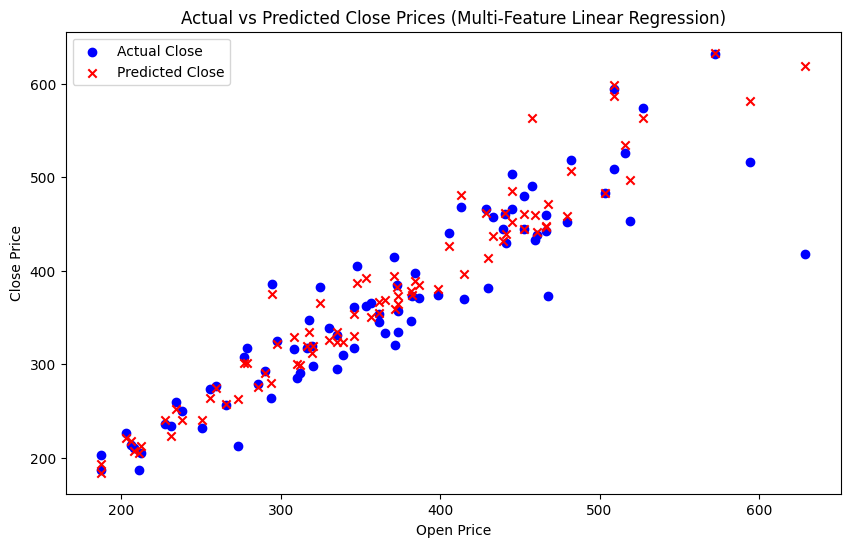

In [14]:
plt.figure(figsize=(10, 6))

# Actual values
plt.scatter(X_test['Open'], y_test, color='blue', label='Actual Close')

# Predicted values
plt.scatter(X_test['Open'], multi_pred, color='red', marker='x', label='Predicted Close')

plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Multi-Feature Linear Regression)')
plt.legend()
plt.show()

In [15]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [16]:
train_errs = []
test_errs = []

for d in range(1, 26):
    pl = make_pipeline(PolynomialFeatures(d), LinearRegression())
    pl.fit(X_train, y_train)
    train_errs.append(mean_squared_error(y_train, pl.predict(X_train)))
    test_errs.append(mean_squared_error(y_test, pl.predict(X_test)))

errs = pd.DataFrame({'Train Error': train_errs, 'Test Error': test_errs})

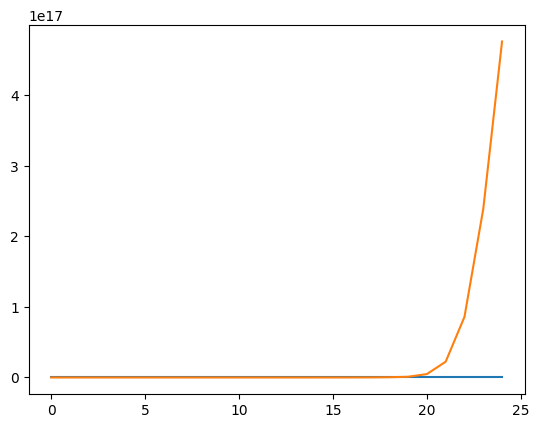

In [17]:
plt.plot(errs)

In [18]:
import plotly.express as px

In [19]:
px.line(errs)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Train Error<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Train Error',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Train Error',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGA==', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('a2TEfgqfVEDZ32bkM61SQBbTRJY2k1' ... '6SJ+OzQFFysq9GsrVASOl9WGKmt0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Test Error<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Test Error',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Test Error',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGA==', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('eP5+Z7l+kEAuOYqpv2+MQKJrctFNtI' ... 'hEDxJzQ1L2S8t2gIpDZhZQ7hdrmkM='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [21]:
df=Aave[['Date','Close']].set_index('Date')
df

,Close
Date,
2020-10-05 23:59:59,53.219243
2020-10-06 23:59:59,42.401599
2020-10-07 23:59:59,40.083976
2020-10-08 23:59:59,43.764463
2020-10-09 23:59:59,46.817744
...,...
2021-07-02 23:59:59,233.948437
2021-07-03 23:59:59,259.655225
2021-07-04 23:59:59,277.038792


In [22]:
def check_stationarity(series):
    result= adfuller(series.values)
    print('ADF Statistic:  %f' % result[0])
    print('p-val: %f' %result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    if (result[1]<=0.05) & (result[4]['5%']> result[0]):
        print('\u001b[32mStationary\u001b[0m')
    else:
        print('\x1b[31mNon-stationary\x1b[0m')

In [23]:
check_stationarity(df)

ADF Statistic:  -1.493670
p-val: 0.536640
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
Non-stationary


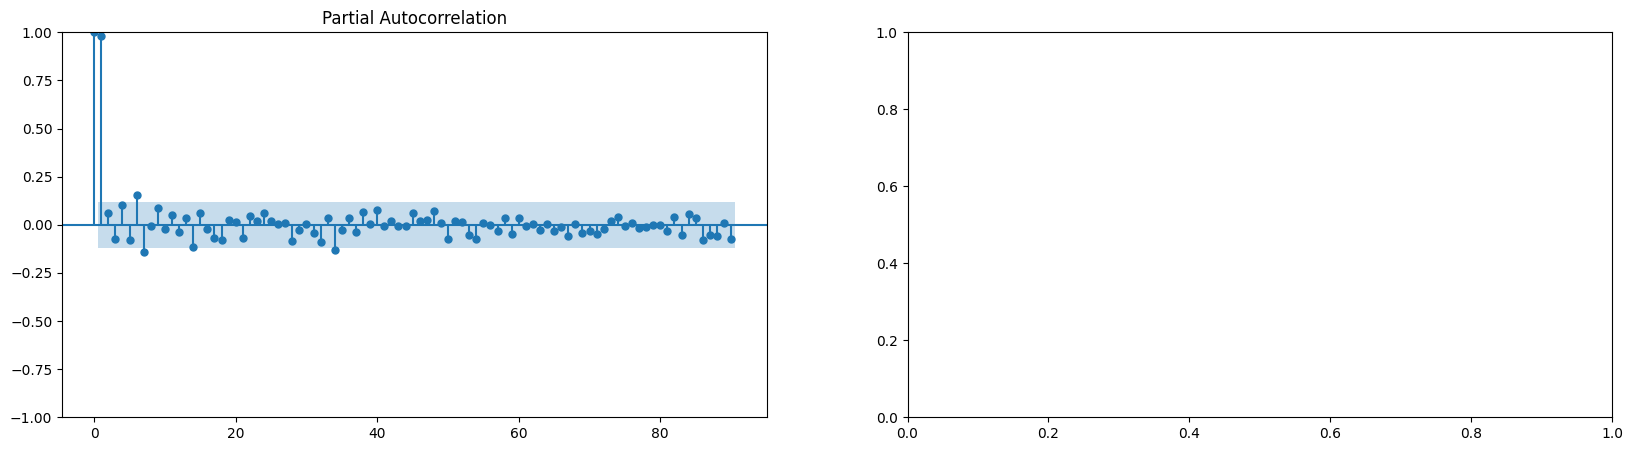

In [ ]:
f, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plot_pacf(df, ax=ax[0], lags=90);
#p=1-35


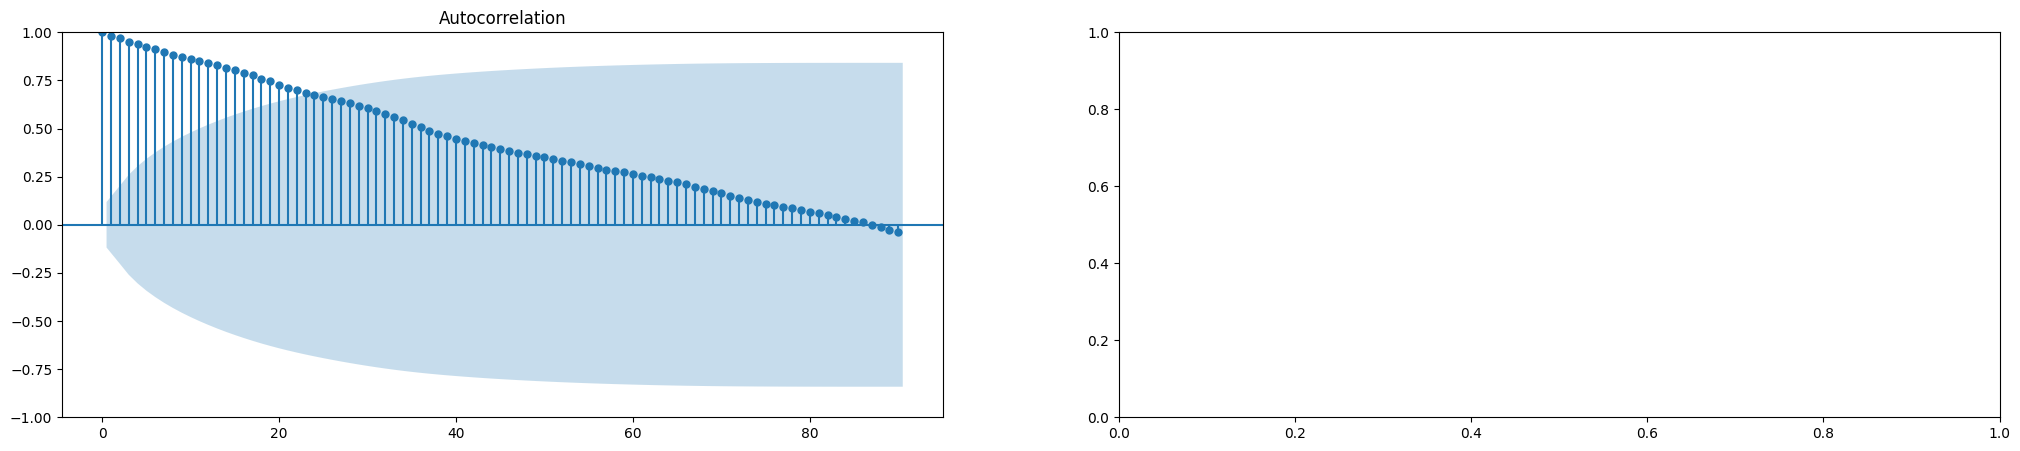

In [ ]:
f, ax=plt.subplots(nrows=1, ncols=2, figsize=(25,5))
plot_acf(df, ax=ax[0], lags=90);
#q=1-24

In [35]:
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [42]:
train.index

DatetimeIndex(['2020-10-05 23:59:59', '2020-10-06 23:59:59',
               '2020-10-07 23:59:59', '2020-10-08 23:59:59',
               '2020-10-09 23:59:59', '2020-10-10 23:59:59',
               '2020-10-11 23:59:59', '2020-10-12 23:59:59',
               '2020-10-13 23:59:59', '2020-10-14 23:59:59',
               ...
               '2021-04-05 23:59:59', '2021-04-06 23:59:59',
               '2021-04-07 23:59:59', '2021-04-08 23:59:59',
               '2021-04-09 23:59:59', '2021-04-10 23:59:59',
               '2021-04-11 23:59:59', '2021-04-12 23:59:59',
               '2021-04-13 23:59:59', '2021-04-14 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=192, freq=None)

In [43]:
import itertools
start_p = 1
max_p = 35
start_q = 1
max_q = 24
start_d = 0
max_d = 2

# Create the parameter grid
p = range(start_p, max_p + 1)
d = range(start_d, max_d + 1)
q = range(start_q, max_q + 1)

pdq_params = list(itertools.product(p, d, q))

best_aic = float('inf')
best_param = None
best_model = None

for param in pdq_params:
    try:
        model = ARIMA(train, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()

        if results.aic < best_aic:
            best_aic = results.aic
            best_param = param
            best_model = results

    except Exception as e:
        print(f"ARIMA{param} failed: {e}")
        continue

print("\n✅ Best ARIMA parameters:", best_param)
print("🔢 Best AIC:", best_aic)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency infor

KeyboardInterrupt: 

In [29]:
model = ARIMA(train["Close"], order=(1,2,22))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likel

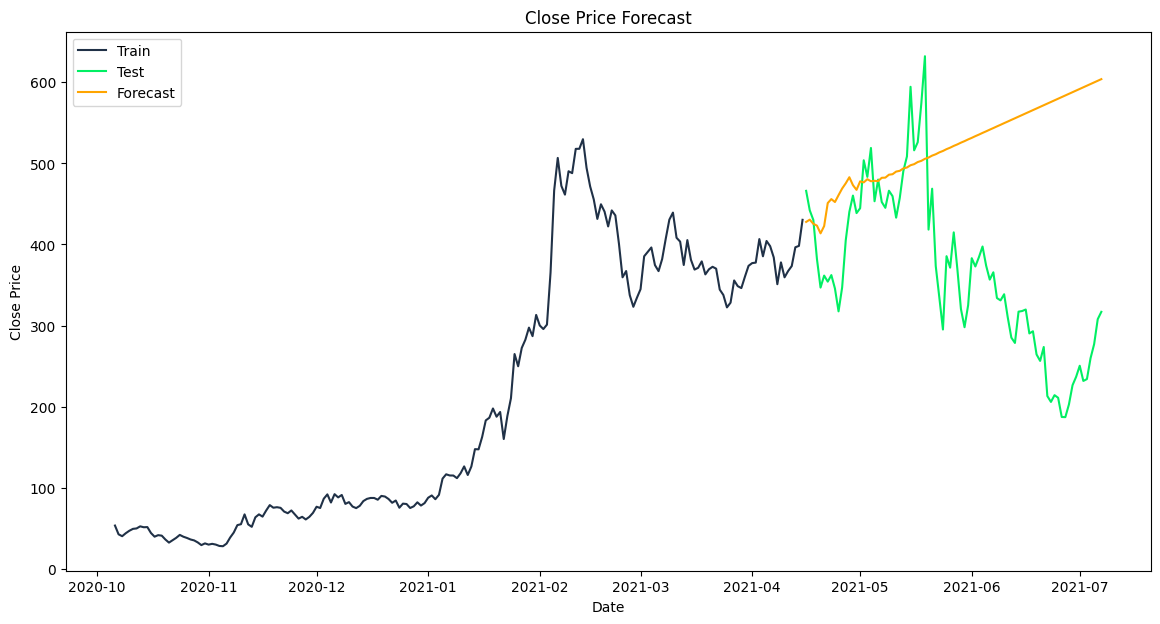

In [30]:
# https://www.datacamp.com/tutorial/arima
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Close"], label='Train', color='#203147')
plt.plot(test.index, test["Close"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [38]:
sarima = SARIMAX(train,order=(1,2,22),seasonal_order=(1, 2, 0,2))
sarima_fit=sarima.fit()
pred=sarima_fit.predict(start=test.index[0],end=test.index[-1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



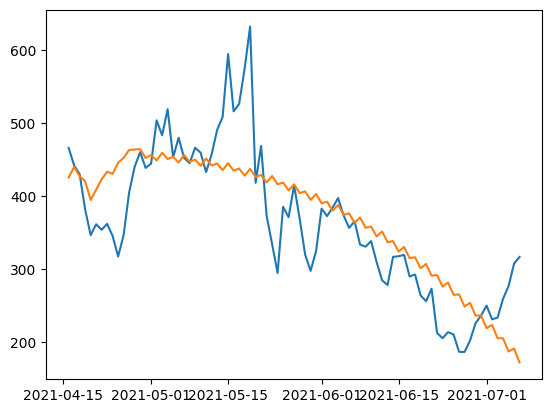

In [39]:
plt.plot(test)
plt.plot(pred)

In [34]:
# p = d = q = range(0, 3)
# P = D = Q = range(0, 2)
# s = 12  # adjust as needed

# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], s) for x in itertools.product(P, D, Q)]

# lowest_aic = float('inf')
# best_params = None

# for param in pdq:
#     for seasonal in seasonal_pdq:
#         try:
#             model = SARIMAX(series,
#                             order=param,
#                             seasonal_order=seasonal,
#                             enforce_stationarity=False,
#                             enforce_invertibility=False)
#             result = model.fit()
#             if result.aic < lowest_aic:
#                 lowest_aic = result.aic
#                 best_params = (param, seasonal)
#             print(f"SARIMA{param}x{seasonal} - AIC:{result.aic}")
#         except:
#             continue

# print("\n✅ Best Params:")
# print("Order (p,d,q):", best_params[0])
# print("Seasonal (P,D,Q,s):", best_params[1])